In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *

In [ ]:
import os
import pandas as pd
import numpy as np
from pathlib import Path

## Read the Dataset

In [ ]:
manual_seed = 555
random.seed(manual_seed)
np.random.seed(manual_seed)
torch.manual_seed(manual_seed)
torch.cuda.manual_seed_all(manual_seed)
torch.backends.cudnn.deterministic = True

In [2]:
data = ImageDataBunch.from_folder('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species',size=224, ds_tfms=get_transforms(), bs=32)
data.train_dl.one_batch()[0].shape

torch.Size([32, 3, 224, 224])

In [4]:
data.train_ds.class2idx

{'n0_mantled_howler': 0,
 'n1_patas_monkey': 1,
 'n2_bald_uakari': 2,
 'n3_japanese_macaque': 3,
 'n4_pygmy_marmoset': 4,
 'n5_white_headed_capuchin': 5,
 'n6_silvery_marmoset': 6,
 'n7_common_squirrel_monkey': 7,
 'n8_black_headed_night_monkey': 8,
 'n9_nilgiri_langur': 9}

In [5]:
i2cmapping = {}
i2cmapping.update(zip(data.train_ds.class2idx.values(), data.train_ds.class2idx.keys()))
pd.Series([i2cmapping[i] for i in data.train_ds.y]).value_counts()/data.train_ds.y.shape[0]*100
pd.Series([i2cmapping[i] for i in data.valid_ds.y]).value_counts()/data.valid_ds.y.shape[0]*100

n3_japanese_macaque             11.121240
n7_common_squirrel_monkey       10.391978
n5_white_headed_capuchin        10.300820
n1_patas_monkey                 10.118505
n2_bald_uakari                  10.027347
n6_silvery_marmoset              9.662716
n8_black_headed_night_monkey     9.662716
n0_mantled_howler                9.571559
n4_pygmy_marmoset                9.571559
n9_nilgiri_langur                9.571559
dtype: float64

n3_japanese_macaque             11.029412
n1_patas_monkey                 10.294118
n5_white_headed_capuchin        10.294118
n7_common_squirrel_monkey       10.294118
n2_bald_uakari                   9.926471
n8_black_headed_night_monkey     9.926471
n6_silvery_marmoset              9.558824
n0_mantled_howler                9.558824
n9_nilgiri_langur                9.558824
n4_pygmy_marmoset                9.558824
dtype: float64

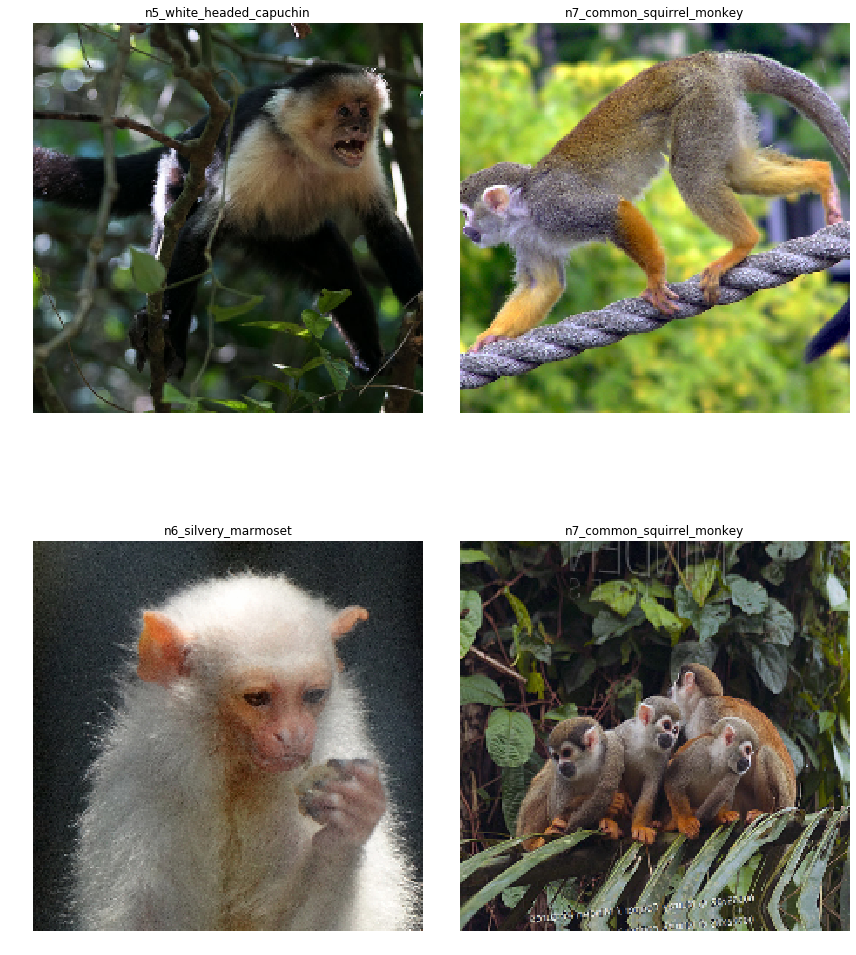

In [3]:
data.show_batch(rows=2)

In [6]:
data.train_ds.tfms

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={'row_pct': 0.1849083610636153, 'col_pct': 0.019350020620983344, 'padding_mode': 'reflection'}, do_run=True, is_random=True),
 RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True),
 RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={'magnitude': tensor([-0.1792,  0.1395,  0.1686,  0.1018]), 'invert': False}, do_run=True, is_random=True),
 RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={'degrees': 1.430121771672738}, do_run=True, is_random=True),
 RandTransform(tfm=TfmAffine (zoom), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'scale': (1.0, 1.1)}, p=0.75, resolved={'row_pct': 0.6166778290998184, 'col_pct': 0.8005147132462663, 'scale': 1.098007436170966}, do_run=True, is_random=True),
 RandTransform(tfm=TfmLighting (brightness), kwargs={'change': 

In [4]:
from fastai.vision import models
learner = ConvLearner(data, models.resnet34, metrics=[error_rate, accuracy])

In [47]:
learner.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


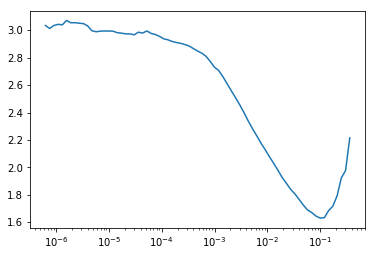

In [23]:
learner.recorder.plot()

In [5]:
learner.fit_one_cycle(5, 1e-2)

Total time: 01:08
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.634417    0.023747    0.003676    0.996324  (00:13)
2      0.333127    0.787892    0.231618    0.768382  (00:13)
3      0.330573    0.209735    0.058824    0.941176  (00:12)
4      0.261775    0.084369    0.025735    0.974265  (00:14)
5      0.173255    0.070926    0.025735    0.974265  (00:13)



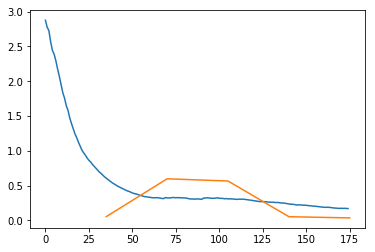

In [56]:
learner.recorder.plot_losses()

In [57]:
learner.unfreeze()
# learner.lr_find()
# learner.recorder.plot()

In [58]:
learner.fit_one_cycle(5, slice(1e-8, 1e-7))

Total time: 01:07
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.127862    0.044491    0.011029    0.988971  (00:13)
2      0.111194    0.038765    0.011029    0.988971  (00:13)
3      0.112363    0.040749    0.014706    0.985294  (00:14)
4      0.109768    0.043253    0.022059    0.977941  (00:13)
5      0.103334    0.040260    0.011029    0.988971  (00:12)



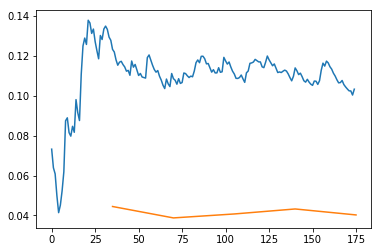

In [60]:
learner.recorder.plot_losses()

In [146]:
interp = ClassificationInterpretation.from_learner(learner)

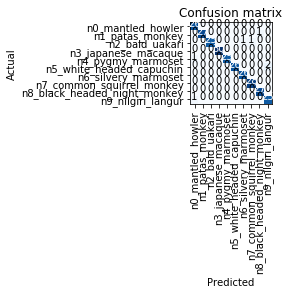

In [147]:
interp.plot_confusion_matrix()

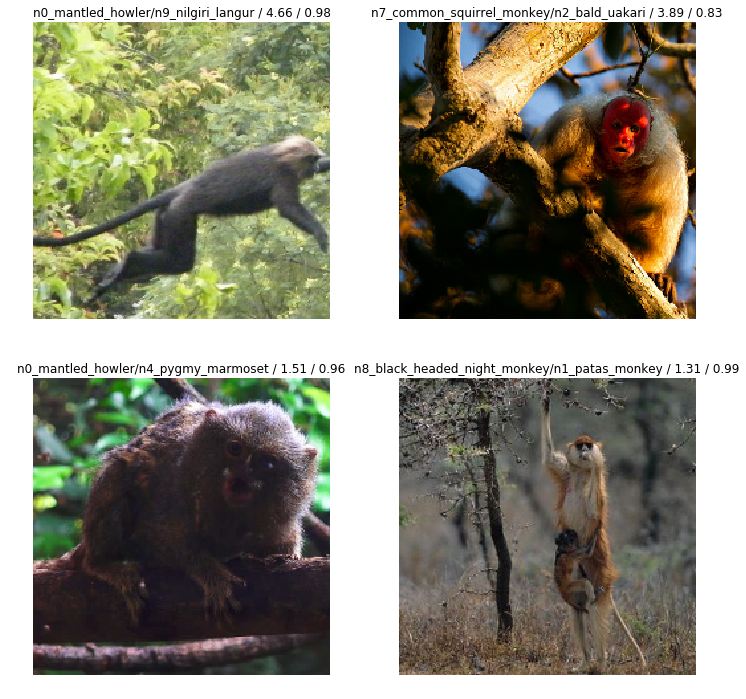

In [153]:
interp.plot_top_losses(4)

In [151]:
interp.most_confused()

[('n5_white_headed_capuchin', 'n9_nilgiri_langur', 2)]

In [156]:
doc(ClassificationInterpretation)